# **Latar Belakang**
---

Layanan taksi merupakan komponen vital dalam sistem transportasi perkotaan, terutama di kota metropolitan seperti New York City (NYC). Setiap harinya, ribuan taksi beroperasi di seluruh kota, melayani jutaan perjalanan yang mencakup berbagai macam keperluan, mulai dari perjalanan harian penduduk lokal hingga wisatawan yang menjelajahi kota. Analisis mendalam terhadap pola perjalanan ini dapat memberikan wawasan berharga mengenai bagaimana layanan taksi digunakan dan bagaimana berbagai faktor mempengaruhi permintaan serta kinerja taksi. Dengan memahami pola perjalanan ini, para pemangku kepentingan dapat mengidentifikasi peluang untuk meningkatkan efisiensi operasional dan pengalaman pelanggan, serta mengatasi tantangan yang mungkin timbul dari perubahan dinamika transportasi di kota besar seperti New York.

## **Pernyataan Masalah**
---
Dalam upaya memahami pola perjalanan taksi dan tren permintaan penumpang di New York City (NYC), penting untuk mengeksplorasi bagaimana jumlah penumpang berfluktuasi pada berbagai waktu dalam sehari dan sepanjang minggu. Oleh karena itu, permasalahan yang ingin dijawab meliputi:

- Bagaimana pola perjalanan taksi berdasarkan jumlah penumpang di setiap jam dalam sehari?
- Apakah terdapat pola atau tren tertentu dalam permintaan penumpang berdasarkan jumlah penumpang harian?
- Bagaimana jumlah penumpang mempengaruhi cara taksi dioperasikan dan dikelola sepanjang waktu?

Penelitian ini bertujuan untuk memberikan wawasan yang lebih baik tentang tren permintaan penumpang, sehingga dapat digunakan oleh para pemangku kepentingan untuk meningkatkan perencanaan operasional dan efisiensi layanan taksi di NYC.



# **Data Understanding**
---
Untuk menjawab pertanyaan di atas, analisis akan dilakukan menggunakan data yang diperoleh dari perusahaan terkait. Dataset yang digunakan untuk analisis ini dapat diakses melalui tautan [berikut](https://drive.google.com/drive/folders/1NYHIL-RgVPW-HONz4pdzlcbIChF-c37N).

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno
import folium
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Berikut informasi mengenai kolom apa saja yang tersedia dalam Dataset **New York City TLC Trip Record**

In [91]:
# Mengambil 5 kolom teratas dan 5 kolom terakhir

df = pd.read_csv('NYC TLC Trip Record.csv')
display(df.head(),df.tail())

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN
68210,2,2023-01-31 23:51:00,2023-02-01 00:07:00,NaN,NaN,256,140,NaN,5.82,23.65,0.0,0.0,2.00,0.0,NaN,1.0,29.40,NaN,NaN,NaN


## **Penjelasan Setiap Variabel (Data Dictionary)**
---

**Dataset New York City TLC Trip Record** menyimpan berbagai informasi yang berkaitan dengan perjalanan taksi di New York City. Berikut adalah beberapa kolom yang terdapat dalam dataset tersebut, beserta penjelasannya:


| Fitur                  | Keterangan                                                                                                                   |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------|
|``VendorID``               | Kode ID yang menunjukkan vendor taksi.                                                                                        |
|                           | 1 = Creative Mobile Technologies, LLC                                                                                         |
|                           | 2 = VeriFone Inc.                                                                                                             |   
|``lpep_pickup_datetime``   | Tanggal dan waktu saat perjalanan taksi dimulai.                                                                              |
|``lpep_dropoff_datetime``  | Tanggal dan waktu saat perjalanan taksi berakhir.                                                                             |
|``store_and_fwd_flag``     | Menunjukkan apakah catatan perjalanan disimpan dalam memori kendaraan sebelum dikirim ke vendor.
|     | Y berarti "simpan dan lanjutkan"
|     | N berarti bukan perjalanan "simpan dan lanjutkan"                                                                                                                    |
|``RatecodeID``             | Kode tarif untuk perjalanan.                                                                                                  |
|                           |1 = Tarif standar                                                                                                              |
|                           |2 = JFK                                                                                                                        |
|                           |3 = Newark                                                                                                                     |
|                           |4 = Nassau atau Westchester                                                                                                    |
|                           |5 = Tarif yang dinegosiasikan                                                                                                  |
|                           |6 = Perjalanan kelompok.                                                                                                       |
|``PULocationID``           | ID lokasi penjemputan, yang sesuai dengan zona taksi di mana meteran (taximeter) diaktifkan.                                  |
|``DOLocationID``           | ID lokasi penurunan, yang sesuai dengan zona taksi di mana meteran (taximeter) dinonaktifkan.                                 |
|``passenger_count``        | Jumlah penumpang di dalam kendaraan.                                                                                          |
|``trip_distance``          | Jarak perjalanan dalam mil.                                                                                                   |
|``fare_amount``            | Tarif yang diukur untuk perjalanan.                                                                                           |
|``extra``                  | Biaya tambahan. Saat ini, ini hanya mencakup biaya tambahan 0,5 dolar dan 1 dolar untuk jam sibuk dan larut malam.            |
|``mta_tax``                | Pajak MTA sebesar 0,50 dolar yang otomatis aktif berdasarkan tarif yang diukur yang digunakan.                                |
|``tip_amount``             | Jumlah tip. Bidang ini otomatis diisi untuk tip kartu kredit. Tip tunai tidak termasuk.                                       |
|``tolls_amount``           | Jumlah total dari semua tol yang dibayar dalam perjalanan.                                                                    |
|``ehail_fee``              | Biaya tambahan 1 dolar untuk setiap perjalanan yang dipesan melalui platform ehail.           |
|``improvement_surcharge``  | Biaya tambahan sebesar 0,30 dolar yang dikenakan pada awal perjalanan. Biaya ini mulai berlaku pada tahun 2015.      |
|``total_amount``           | Jumlah total yang dikenakan kepada penumpang, termasuk tarif yang diukur, biaya tambahan, mta_tax, tip_amount, dan tolls_amount, serta biaya tambahan ehail atau improvement_surcharge.                                                                                                   |
|``payment_type``           | Kode numerik yang menunjukkan metode pembayaran.   
|                           | 1 = Kartu Kredit                                                                                                               |
|                           | 2 = Uang Tunai                                                                                                                  |  
|                           | 3 = Tanpa Biaya                                                                                                               |
|                           | 4 = Sengketa                                                                                                                  |
|                           | 5 = Tidak Diketahui                                                                                                               |
|                           | 6 = Perjalanan Dibatalkan                                                                                                                  |                                                                          |
|``trip_type``              | Kode yang menunjukkan apakah perjalanan adalah street-hail (diambil di pinggir jalan) atau dispatch (dipesan sebelumnya) tetapi dapat diubah oleh pengemudi.                                                                                                               |
|                           | 1 = Street-hail                                                                                                               |
|                           | 2 = Dispatch                                                                                                                  |
|``congestion_surcharge``   | Biaya kemacetan sebesar $2,75 untuk perjalanan dengan taksi di Manhattan bagian selatan dari 96th St. Biaya ini mulai berlaku pada tahun 2019.                                                                                                                                 |



In [92]:
# Melihat jumlah baris dan kolom dataset

print(f"Jumlah baris dataset: {df.shape[0]}")
print(f"Jumlah kolom dataset: {df.shape[1]}")

Jumlah baris dataset: 68211
Jumlah kolom dataset: 20


In [93]:
# Melihat informasi umum dari dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [94]:
# Melihat ringkasan statistik semua kolom, baik numerik maupun kategorik

display(df.describe(), df.describe(include='object'))

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


In [95]:
# Menampilkan nilai unik pada setiap kolom yang ada :

pd.set_option('display.max_colwidth', 1)

# data unik di tiap kolom

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,VendorID,2,"[2, 1]"
1,lpep_pickup_datetime,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 2023-01-01 00:35:12, 2023-01-01 00:13:14, 2023-01-01 00:33:04, 2023-01-01 00:53:31, 2023-01-01 00:09:14, 2023-01-01 00:11:58, 2023-01-01 00:41:29, 2023-01-01 00:50:32, 2023-01-01 00:16:12, 2023-01-01 00:08:43, 2023-01-01 00:26:32, 2023-01-01 00:18:35, 2023-01-01 00:39:32, 2023-01-01 00:49:34, 2023-01-01 00:10:45, 2023-01-01 00:35:11, 2023-01-01 00:31:06, 2023-01-01 00:14:37, 2023-01-01 00:26:21, 2023-01-01 00:41:56, 2023-01-01 00:32:02, 2023-01-01 00:55:13, 2023-01-01 00:01:31, 2023-01-01 00:22:31, 2023-01-01 00:57:28, 2023-01-01 00:35:21, 2023-01-01 00:52:52, 2023-01-01 00:32:56, 2023-01-01 00:24:01, 2023-01-01 00:46:48, 2023-01-01 00:40:58, 2023-01-01 00:20:23, 2023-01-01 01:49:24, 2023-01-01 00:41:53, 2023-01-01 00:56:26, 2023-01-01 00:33:10, 2023-01-01 00:58:28, 2023-01-01 00:42:49, 2023-01-01 00:48:21, 2023-01-01 00:08:05, 2023-01-01 00:13:47, 2023-01-01 00:16:10, 2023-01-01 00:04:25, 2023-01-01 00:33:38, 2023-01-01 00:46:08, 2023-01-01 01:00:08, 2023-01-01 00:28:04, 2023-01-01 00:23:04, 2023-01-01 00:34:07, 2023-01-01 00:52:03, 2023-01-01 00:25:31, 2023-01-01 00:53:09, 2023-01-01 00:42:37, 2023-01-01 00:39:52, 2023-01-01 00:15:32, 2023-01-01 00:06:48, 2023-01-01 00:57:15, 2023-01-01 00:14:13, 2023-01-01 00:52:48, 2023-01-01 00:34:13, 2023-01-01 00:44:41, 2023-01-01 00:11:12, 2023-01-01 01:44:43, 2023-01-01 01:04:44, 2023-01-01 01:48:11, 2023-01-01 01:11:39, 2023-01-01 01:54:25, 2023-01-01 01:59:10, 2023-01-01 01:22:35, 2023-01-01 01:37:10, 2023-01-01 01:46:22, 2023-01-01 01:59:48, 2023-01-01 01:09:49, 2023-01-01 01:23:35, 2023-01-01 01:53:20, 2023-01-01 01:32:14, 2023-01-01 01:01:05, 2023-01-01 01:34:41, 2023-01-01 01:52:08, 2023-01-01 01:49:28, 2023-01-01 01:03:59, 2023-01-01 01:13:11, 2023-01-01 01:40:06, 2023-01-01 01:33:50, 2023-01-01 01:45:19, 2023-01-01 01:51:29, 2023-01-01 01:34:07, 2023-01-01 01:10:08, 2023-01-01 01:32:17, 2023-01-01 01:48:28, 2023-01-01 01:30:43, 2023-01-01 01:51:10, 2023-01-01 01:09:36, 2023-01-01 01:19:54, 2023-01-01 01:31:10, 2023-01-01 01:42:30, 2023-01-01 00:57:51, 2023-01-01 01:27:36, ...]"
2,lpep_dropoff_datetime,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 2023-01-01 00:41:32, 2023-01-01 00:19:03, 2023-01-01 00:39:02, 2023-01-01 01:11:04, 2023-01-01 00:26:39, 2023-01-01 00:24:55, 2023-01-01 00:46:26, 2023-01-01 01:13:42, 2023-01-01 00:41:43, 2023-01-01 00:17:08, 2023-01-01 00:45:31, 2023-01-01 00:30:09, 2023-01-01 01:18:06, 2023-01-01 01:08:23, 2023-01-01 00:19:37, 2023-01-01 01:17:35, 2023-01-01 00:42:23, 2023-01-01 00:21:50, 2023-01-01 00:30:26, 2023-01-01 00:46:06, 2023-01-01 00:41:25, 2023-01-01 00:59:47, 2023-01-01 00:16:02, 2023-01-01 00:39:24, 2023-01-01 01:09:31, 2023-01-01 00:53:49, 2023-01-01 01:00:53, 2023-01-01 00:42:53, 2023-01-01 00:32:05, 2023-01-01 01:08:17, 2023-01-01 01:04:32, 2023-01-01 00:24:32, 2023-01-01 01:57:51, 2023-01-01 00:41:58, 2023-01-01 01:14:41, 2023-01-01 00:43:08, 2023-01-01 01:14:46, 2023-01-01 00:51:53, 2023-01-01 01:23:50, 2023-01-01 00:13:26, 2023-01-01 00:25:57, 2023-01-01 00:54:55, 2023-01-01 00:17:50, 2023-01-01 00:38:51, 2023-01-01 00:59:10, 2023-01-01 01:05:46, 2023-01-01 00:43:45, 2023-01-01 23:18:32, 2023-01-01 00:50:01, 2023-01-01 00:57:56, 2023-01-01 00:38:40, 2023-01-01 01:13:35, 2023-01-01 00:47:15, 2023-01-01 00:48:54, 2023-01-01 00:23:03, 2023-01-01 01:08:47, 2023-01-01 01:00:15, 2023-01-01 00:25:43, 2023-01-01 01:21:19, 2023-01-01 00:43:57, 2023-01-01 00:48:26, 2023-01-01 00:38:12, 2023-01-01 01:57:31, 2023-01-01 01:11:23, 2023-01-01 02:05:51, 2023-01-01 01:41:21, 2023-01-01 02:05:19, 2023-01-01 02:11:36, 2023-01-01 01:25:11, 2023-01-01 01:41:30, 2023-01-01 02:04:14, 2023-01-01 02:05:29, 2023-01-01 01:17:55, 2023-01-01 01:53:43, 2023-01-01 02:27:01, 2023-01-01 01:43:55, 2023-01-01 01:13:02, 2023-01-01 02:00:06, 2023-01-01 02:00:57, 2023-01-01 02:13:18, 2023-01-01 01:07:17, 2023-01-01 01:26:01, 2

## **Missing Values**
---

In [96]:
# Melihat jumlah missing value

missing = pd.DataFrame({'jumlah':df.isnull().sum().sort_values(ascending = False)})
missing

,jumlah
ehail_fee,68211
trip_type,4334
congestion_surcharge,4324
store_and_fwd_flag,4324
RatecodeID,4324
payment_type,4324
passenger_count,4324
tip_amount,0
total_amount,0
improvement_surcharge,0


In [97]:
# Melihat persentase missing values

total_baris_data = len(df)
missing['persentase %'] = round((missing['jumlah']/total_baris_data)*100,2)
missing

,jumlah,persentase %
ehail_fee,68211,100.00
trip_type,4334,6.35
congestion_surcharge,4324,6.34
store_and_fwd_flag,4324,6.34
RatecodeID,4324,6.34
payment_type,4324,6.34
passenger_count,4324,6.34
tip_amount,0,0.00
total_amount,0,0.00
improvement_surcharge,0,0.00


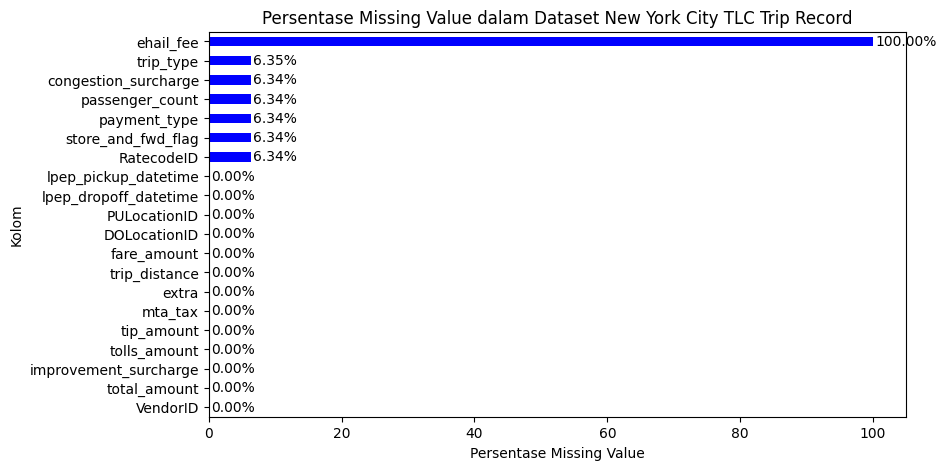

In [98]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

# Sebaran missing value di dalam data
missing_values_count = df.isna().sum()
missing_values_percentage = (missing_values_count / len(df)) * 100

# Visualisasi menggunakan horizontal bar plot untuk sebaran missing value
plt.figure(figsize=(9, 5))
ax = missing_values_percentage.sort_values().plot(kind='barh', color='blue')
plt.title('Persentase Missing Value dalam Dataset New York City TLC Trip Record')
plt.xlabel('Persentase Missing Value')
plt.ylabel('Kolom')
for i, v in enumerate(missing_values_percentage.sort_values()):
    ax.text(v + 0.3, i, f'{v:.2f}%', color='black', ha='left', va='center')
plt.show()

<Axes: >

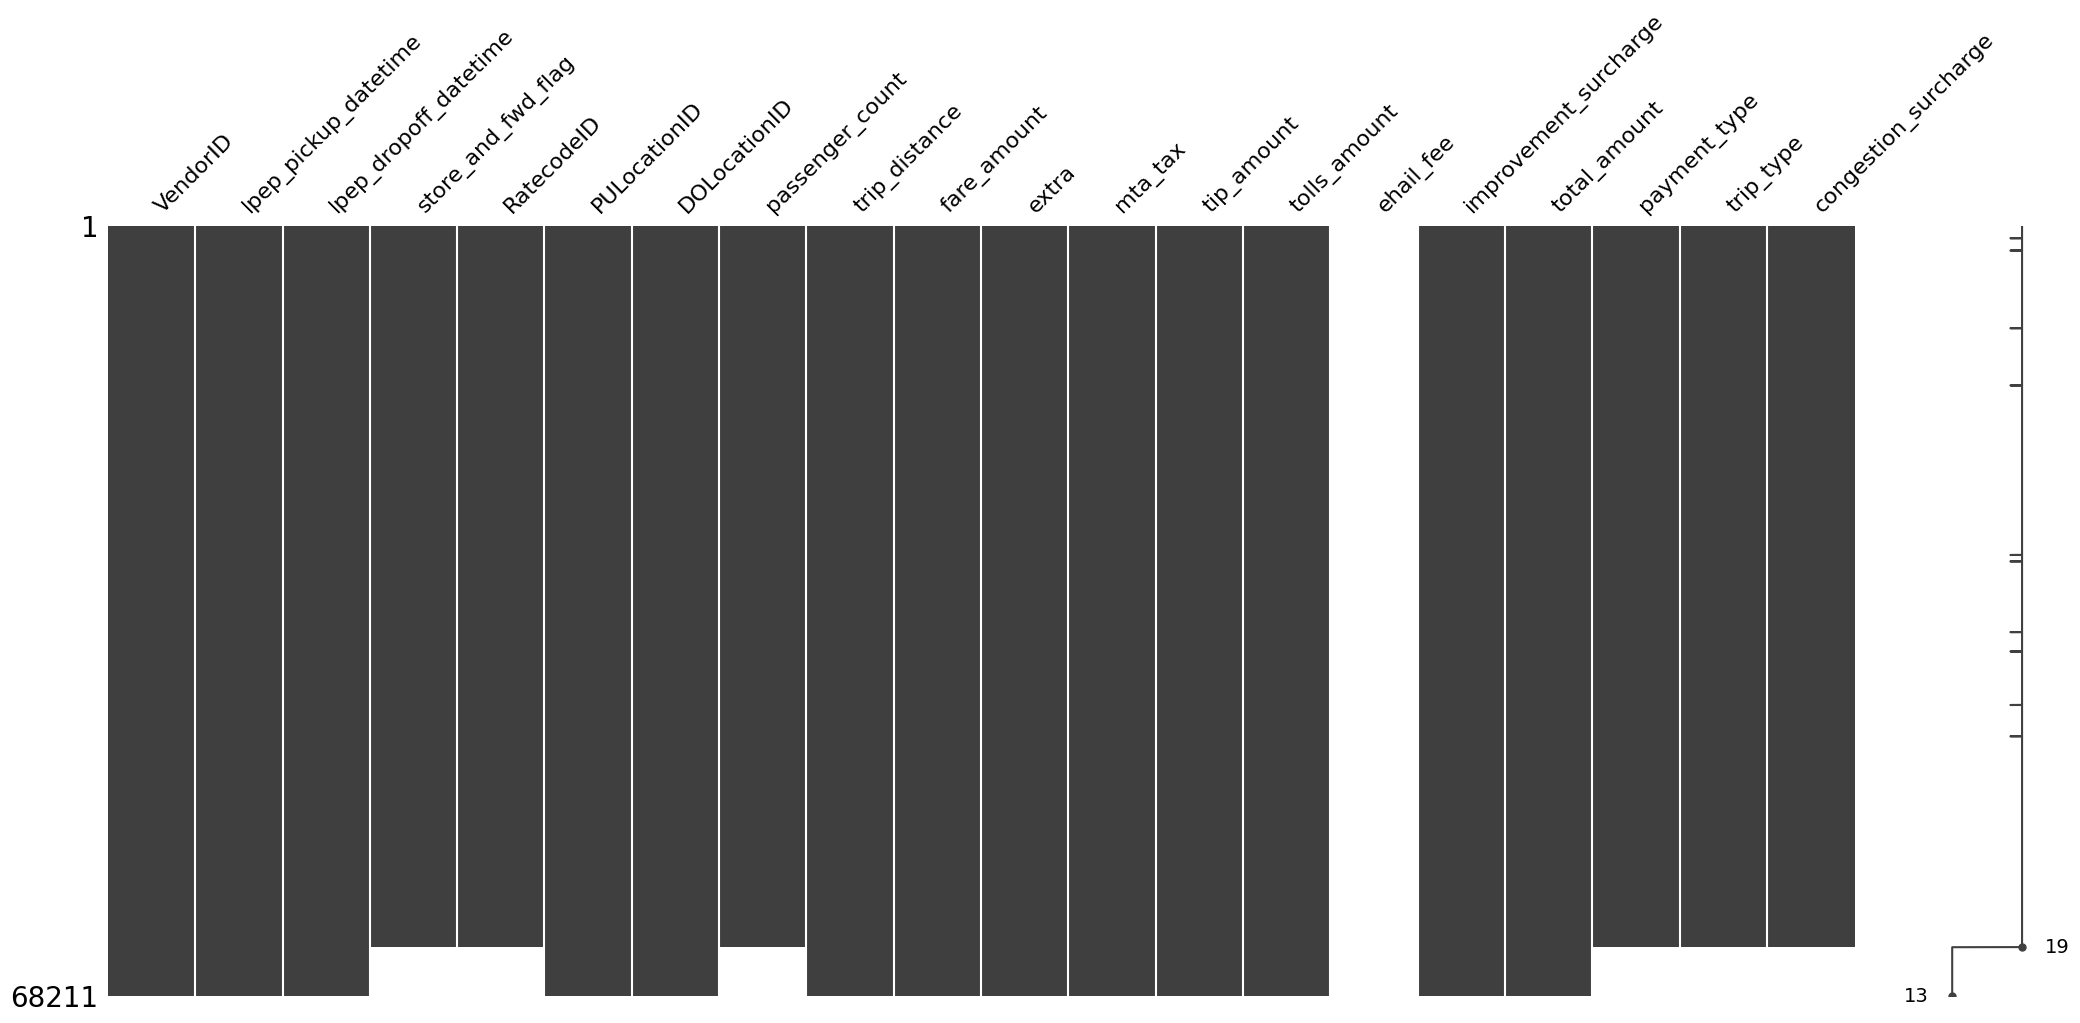

In [99]:
# Hubungan antar missing values secara visualisasi

missingno.matrix(df)

In [100]:
# lihat semua data yang kosong
df[df.isna().any(axis = 1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.20,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


namun karena data enhail_fee memiliki persentase missing value 100%, maka di drop sementara untuk mengecek data missing value pada kolom lain.

In [101]:
# lihat semua data yang kosong
df[df.isna().any(axis = 1)][df.drop(['ehail_fee'], axis = 1).isna().any(axis = 1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.30,18.20,0.0,1.5,0.00,0.0,NaN,1.0,19.70,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.70,23.50,0.0,1.5,0.00,0.0,NaN,1.0,25.00,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.20,28.20,0.0,1.5,0.00,0.0,NaN,1.0,29.70,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.70,22.50,0.0,1.5,0.00,0.0,NaN,1.0,24.00,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.50,24.20,0.0,1.5,0.00,0.0,NaN,1.0,25.70,1.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


## **Data Duplikat**
---

In [102]:
# jumlah yang duplikat
df.duplicated().sum()

0

## **Variabel Numerik**
---

### **Statistika Deskriptif**
---

In [103]:
# Statistika dekriptif
df.describe() # OTOMATIS hanya mengambil yang numerik

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,0.0,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,NaN,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,NaN,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,NaN,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,NaN,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,NaN,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,NaN,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,NaN,1.000000,491.000000,5.000000,2.000000,2.750000


In [104]:
# kalau lebih nyaman dilihatnya dengan transpose
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,68211.0,1.863028,0.343820,1.00,2.00,2.00,2.00,2.00
RatecodeID,63887.0,1.117160,1.372913,1.00,1.00,1.00,1.00,99.00
PULocationID,68211.0,98.549735,61.244314,1.00,74.00,75.00,129.00,265.00
DOLocationID,68211.0,138.429901,76.761311,1.00,74.00,138.00,219.00,265.00
passenger_count,63887.0,1.315870,0.979054,0.00,1.00,1.00,1.00,9.00
trip_distance,68211.0,8.114852,585.105955,0.00,1.11,1.85,3.21,120098.84
fare_amount,68211.0,16.603545,13.470121,-70.00,9.30,13.50,19.80,490.00
extra,68211.0,0.825431,1.269904,-2.50,0.00,0.00,1.00,12.50
mta_tax,68211.0,0.588340,0.385819,-0.50,0.50,0.50,0.50,2.75
tip_amount,68211.0,2.139012,3.052710,-10.50,0.00,1.60,3.33,222.22


### **Distribusi Data**
---

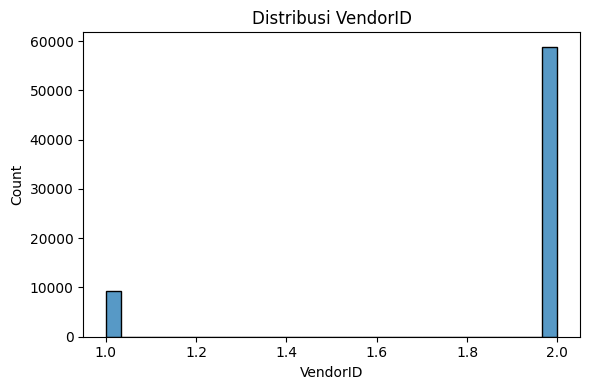

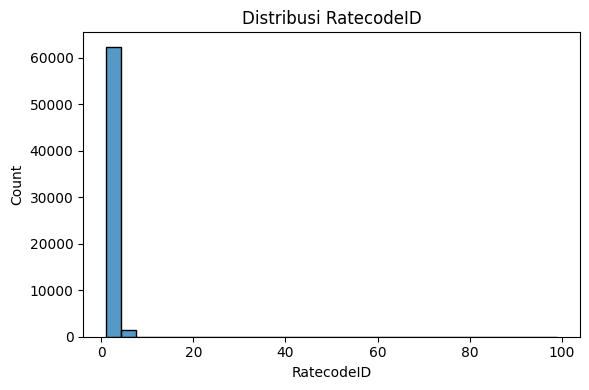

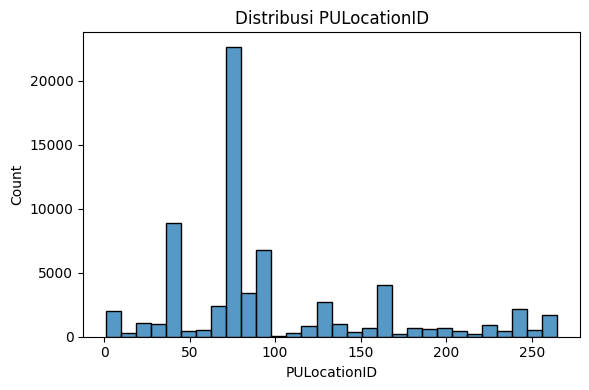

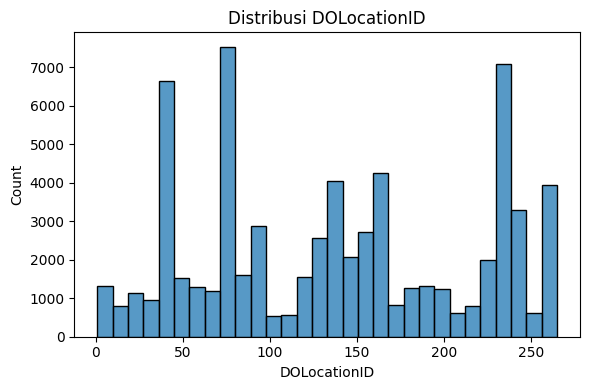

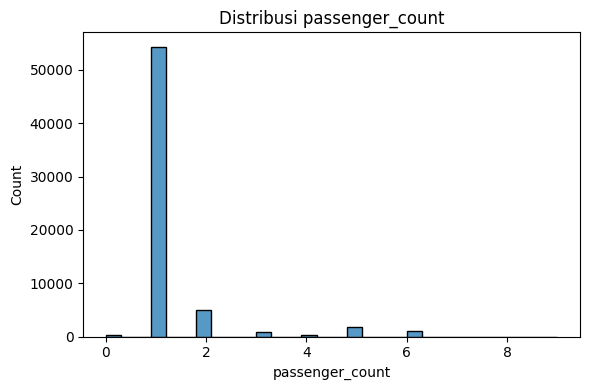

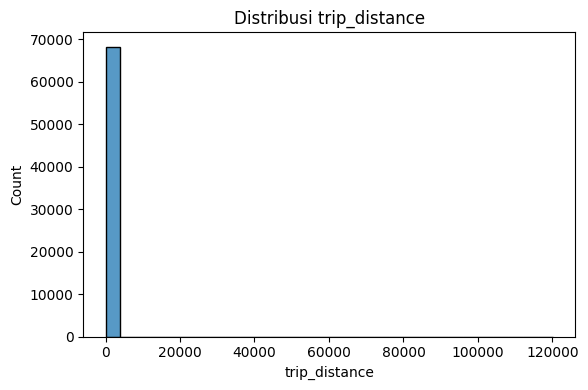

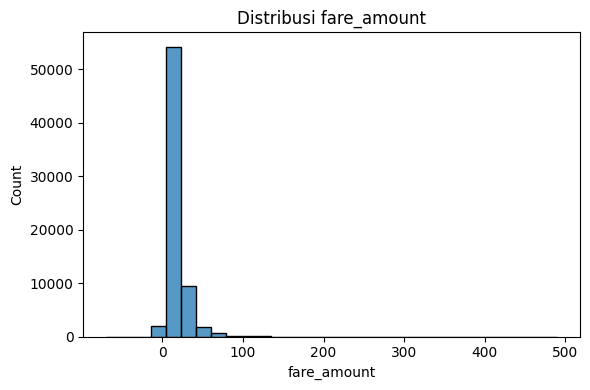

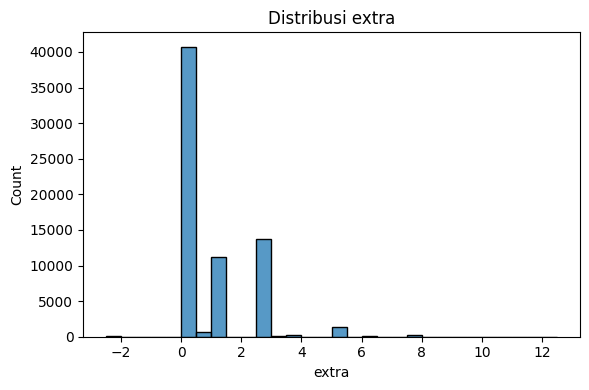

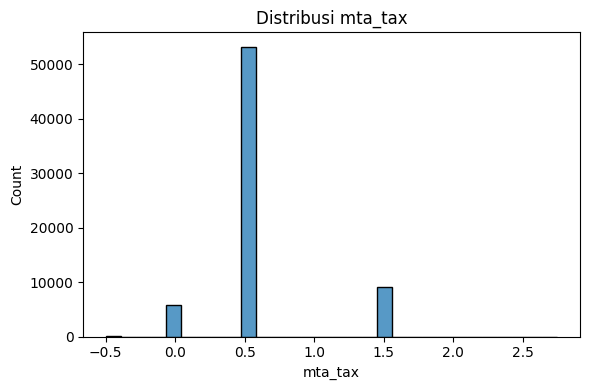

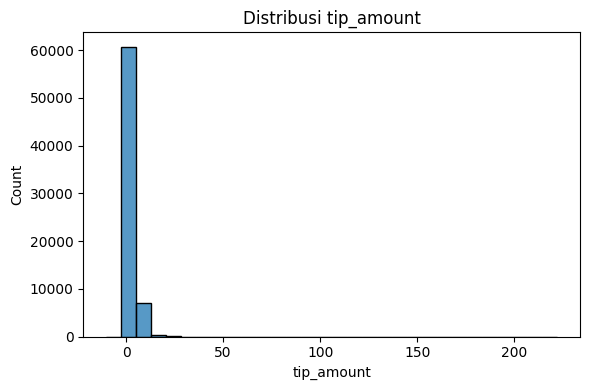

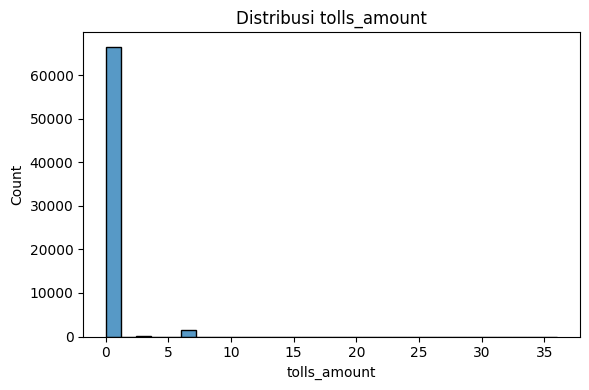

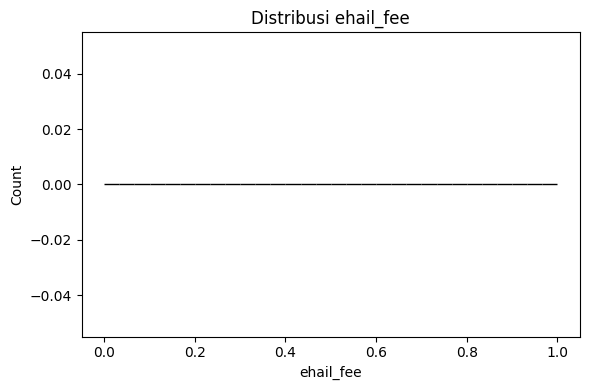

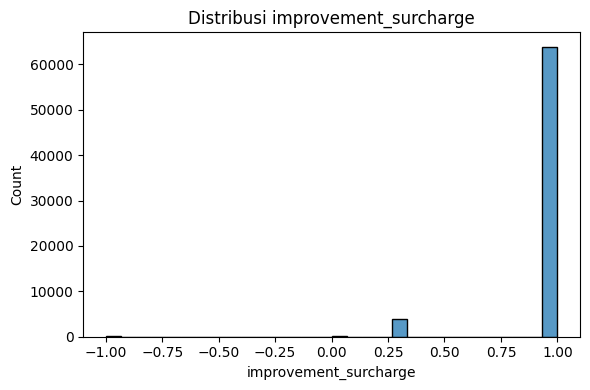

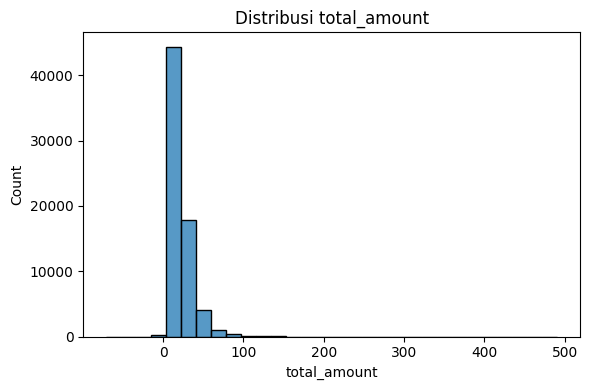

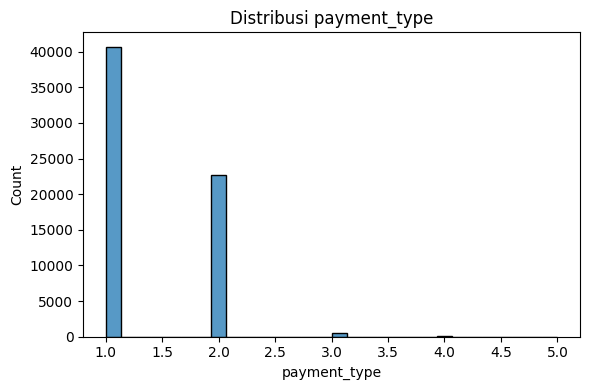

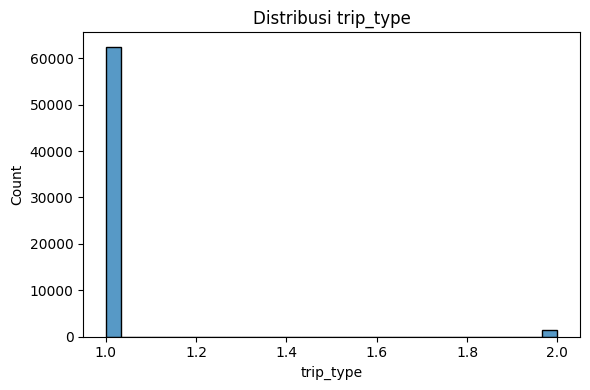

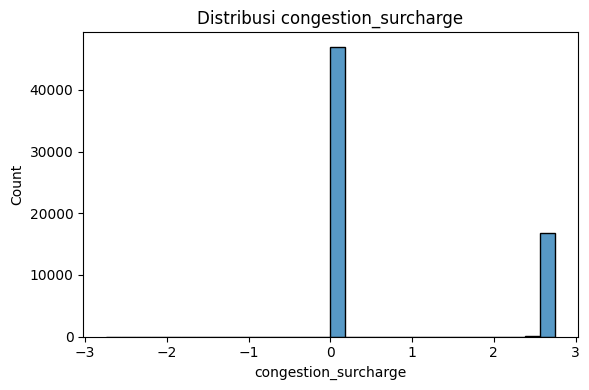

In [105]:
numerik = df.select_dtypes(include='number')

for setiap_kolom in numerik.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[setiap_kolom], bins=30)
    plt.title(f'Distribusi {setiap_kolom}')
    plt.tight_layout()
    plt.show()  # Menampilkan plot

### **Uji Statistika**
---

Untuk melakukan uji statistika, **data harus tidak memiliki missing values**, jadi sementara bisa di drop dulu data yang missing value

In [106]:
# Drop sementara
df_copy = df.copy()
df_copy.dropna(inplace = True)

In [107]:
!pip install scipy

Shapiro Wilk

In [108]:
# Uji statistika total_amount

from scipy.stats import shapiro

stat, pval = shapiro(df['total_amount'])

if pval < 0.05:
    print('Data tidak normal')
else:
    print('Data normal')

print('stat: ', stat)
print('pval: ', pval)

Data tidak normal
stat:  0.6990310367139725
pval:  8.533402556303879e-135


In [109]:
# Uji statistika trip_distance

from scipy.stats import shapiro

stat, pval = shapiro(df['trip_distance'])

if pval < 0.05:
    print('Data tidak normal')
else:
    print('Data normal')

print('stat: ', stat)
print('pval: ', pval)

Data tidak normal
stat:  0.001732544203016051
pval:  4.230799747838664e-173


In [110]:
# Uji statistika tip_amount

from scipy.stats import shapiro

stat, pval = shapiro(df['tip_amount'])

if pval < 0.05:
    print('Data tidak normal')
else:
    print('Data normal')

print('stat: ', stat)
print('pval: ', pval)

Data tidak normal
stat:  0.637580730549907
pval:  2.0545545502145305e-140


### **Outliers**
---

Boxplot

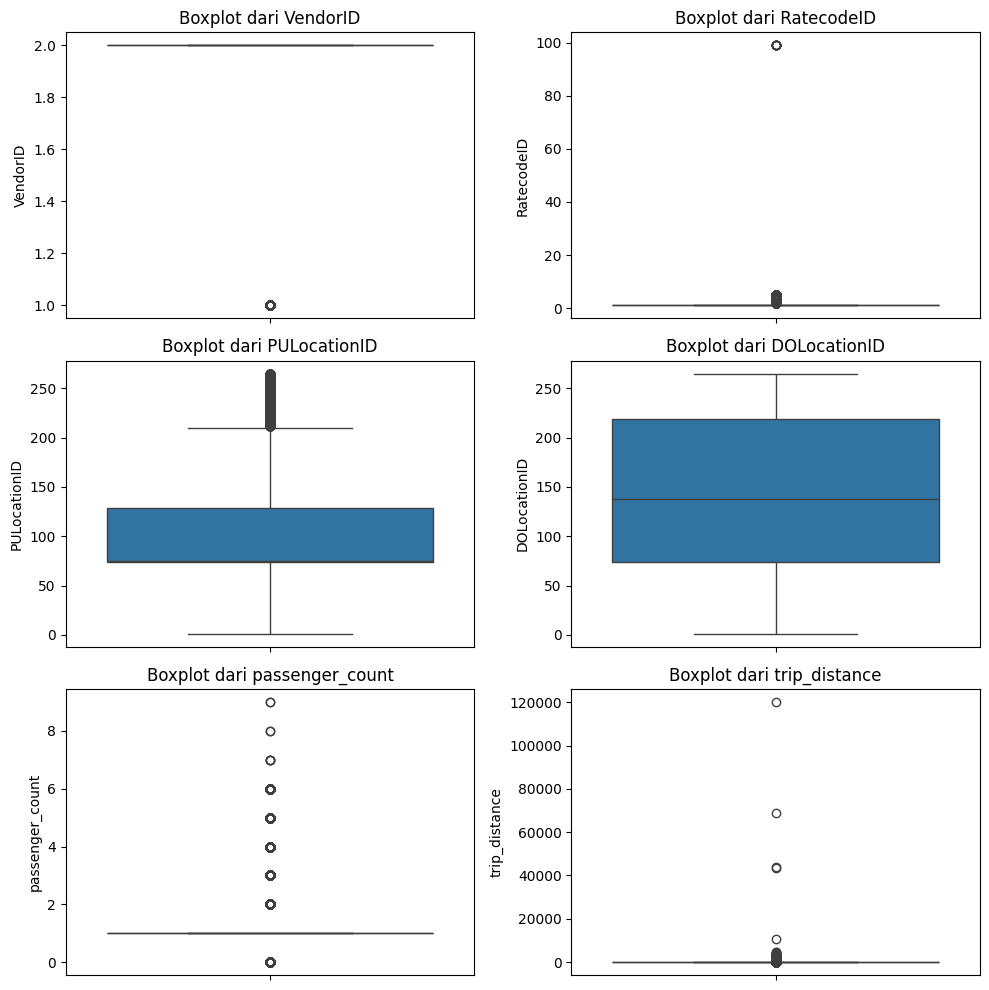

In [111]:
numerik = df.select_dtypes(include = 'number')

# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (10,10))

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in numerik.columns:
    if posisi <= 6:  # Pastikan posisi tidak melebihi jumlah subplot yang diizinkan
        plt.subplot(3, 2, posisi)  # Mengatur subplot dengan grid 3x2
        sns.boxplot(data=df[setiap_kolom])  # Membuat boxplot
        plt.title(f'Boxplot dari {setiap_kolom}')  # Menambahkan judul pada setiap plot
        posisi += 1  # Pindah ke posisi subplot berikutnya
        plt.tight_layout()  # Mengatur tata letak subplot agar tidak tumpang tindih

Inter Quartile Range (IQR) * 1.5

In [112]:
list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    q3 = numerik.describe()[setiap_kolom]['75%']
    q1 = numerik.describe()[setiap_kolom]['25%']
    iqr = q3 - q1
    whis = 1.5 * iqr
    upper_bound = q3 + whis
    lower_bound = q1 - whis

    jumlah_outliers = len(numerik[(numerik[setiap_kolom] > upper_bound) | (numerik[setiap_kolom] < lower_bound)])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

})


,kolom,jumlah outliers
0,VendorID,9343
1,RatecodeID,1784
2,PULocationID,6133
3,DOLocationID,0
4,passenger_count,9588
5,trip_distance,5774
6,fare_amount,4339
7,extra,3586
8,mta_tax,15034
9,tip_amount,2045


Z Score

In [113]:
list_jumlah_outliers = []
for setiap_kolom in numerik.columns:
    std = df[setiap_kolom].std()
    mean = df[setiap_kolom].mean()

    zscore = abs((df[setiap_kolom]-mean)/std) # rumus zscore
    jumlah_outliers = len(zscore[zscore>2])
    list_jumlah_outliers.append(jumlah_outliers)

pd.DataFrame({
                'kolom': numerik.columns,
                'jumlah outliers': list_jumlah_outliers

})

,kolom,jumlah outliers
0,VendorID,9343
1,RatecodeID,1596
2,PULocationID,5869
3,DOLocationID,0
4,passenger_count,3198
5,trip_distance,33
6,fare_amount,2397
7,extra,1960
8,mta_tax,9231
9,tip_amount,2134


### **Korelasi**
---

In [114]:
numerik.corr()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,-0.008287,-0.011331,-0.001492,0.084265,0.004002,0.006724,-0.136073,-0.908011,0.061815,-0.017384,NaN,-0.071401,0.019674,0.007002,0.042880,0.009523
RatecodeID,-0.008287,1.000000,0.037356,0.012573,-0.004009,0.026716,0.097378,-0.048503,-0.090009,0.006248,0.022052,NaN,-0.036233,0.078795,-0.019782,0.936312,-0.038727
PULocationID,-0.011331,0.037356,1.000000,0.088810,0.011221,0.001117,0.101706,0.008658,-0.022282,0.023519,0.040363,NaN,0.004847,0.090600,0.037847,0.065958,-0.080319
DOLocationID,-0.001492,0.012573,0.088810,1.000000,0.001716,0.000816,0.086010,0.067073,-0.005738,0.117193,0.000442,NaN,-0.006360,0.131167,-0.104812,0.029810,0.419986
passenger_count,0.084265,-0.004009,0.011221,0.001716,1.000000,0.007186,0.013237,-0.006019,-0.079977,0.026053,0.003623,NaN,0.027175,0.019824,-0.014177,-0.001703,0.023339
trip_distance,0.004002,0.026716,0.001117,0.000816,0.007186,1.000000,0.012833,-0.005774,-0.014687,0.003216,0.000808,NaN,-0.001646,0.011702,-0.013694,-0.001135,0.084841
fare_amount,0.006724,0.097378,0.101706,0.086010,0.013237,0.012833,1.000000,-0.003625,-0.074420,0.313688,0.335509,NaN,0.069489,0.967764,-0.052622,0.157503,0.149941
extra,-0.136073,-0.048503,0.008658,0.067073,-0.006019,-0.005774,-0.003625,1.000000,0.200986,0.101623,0.062253,NaN,0.078139,0.100460,-0.085146,-0.087019,0.091409
mta_tax,-0.908011,-0.090009,-0.022282,-0.005738,-0.079977,-0.014687,-0.074420,0.200986,1.000000,-0.091542,-0.020641,NaN,0.154879,-0.075833,-0.028368,-0.253546,0.012407
tip_amount,0.061815,0.006248,0.023519,0.117193,0.026053,0.003216,0.313688,0.101623,-0.091542,1.000000,0.196708,NaN,0.026255,0.511460,-0.500553,0.019974,0.265940


## **Variabel Kategorik**
---

In [115]:
df.describe(include = 'object')

,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag
count,68211,68211,63887
unique,66575,66519,2
top,2023-01-09 09:08:00,2023-01-09 00:00:00,N
freq,4,6,63579


### **Unique Value**
---

In [116]:
kategorik = df.select_dtypes(include = 'object')

# menghitung jumlah unique value setiap variabel kategorik
kategorik.nunique()

,0
lpep_pickup_datetime,66575
lpep_dropoff_datetime,66519
store_and_fwd_flag,2


<Axes: >

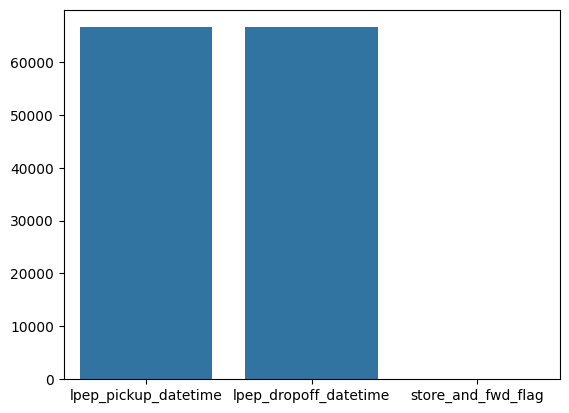

In [117]:
sns.barplot(kategorik.nunique())

### **Value Count**
---

In [118]:
df['lpep_pickup_datetime'].value_counts().head(10)

,count
lpep_pickup_datetime,
2023-01-09 09:08:00,4
2023-01-07 23:58:06,4
2023-01-20 09:06:00,3
2023-01-21 12:55:00,3
2023-01-24 16:45:21,3
2023-01-23 08:08:33,3
2023-01-19 10:07:01,3
2023-01-20 17:14:00,3
2023-01-05 09:13:00,3


In [119]:
df['lpep_dropoff_datetime'].value_counts().head(10)

,count
lpep_dropoff_datetime,
2023-01-09 00:00:00,6
2023-01-22 00:00:00,6
2023-01-06 00:00:00,6
2023-01-20 00:00:00,5
2023-01-25 00:00:00,5
2023-01-12 00:00:00,5
2023-01-13 00:00:00,4
2023-01-02 00:00:00,4
2023-01-12 09:29:00,4


In [120]:
df['store_and_fwd_flag'].value_counts().head(10)

,count
store_and_fwd_flag,
N,63579
Y,308


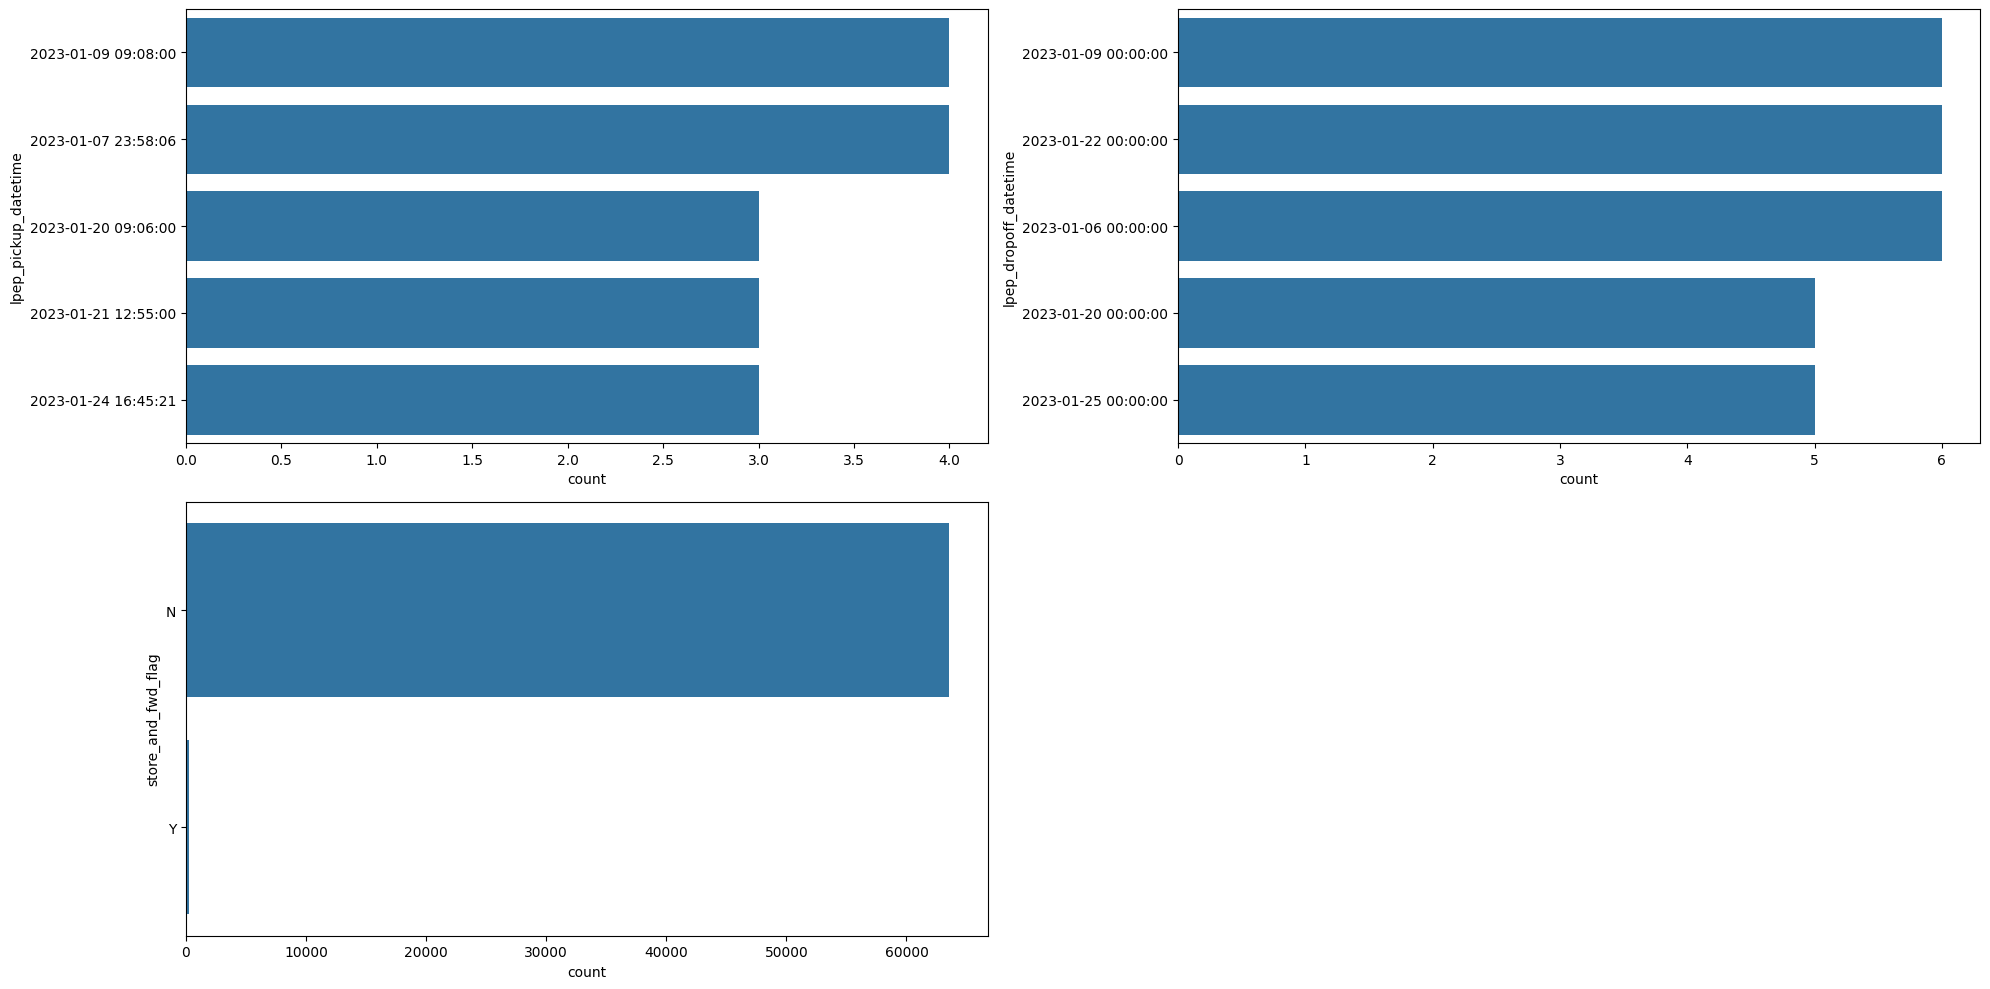

In [121]:
# ganti ukuran pigura (wadah grafik nya)
plt.figure(figsize = (20,10)) # (horizontal, vertikal)

posisi = 1 # menginisiasi posisi mulai dari 1
for setiap_kolom in kategorik.columns: # kategorik.columns = nama-nama kolom dalam list
    plt.subplot(2,2,posisi)
    sns.barplot(df[setiap_kolom].value_counts().head(5), orient = 'h')
    posisi = posisi + 1
    # agar tidak bertumpuk
    plt.tight_layout()

# **Data Cleaning**
---

In [125]:
# kolom yang numerikal yang akan dianalisis
numerik = ['total_amount', 'trip_distance', 'tip_amount', 'passenger_count' ]

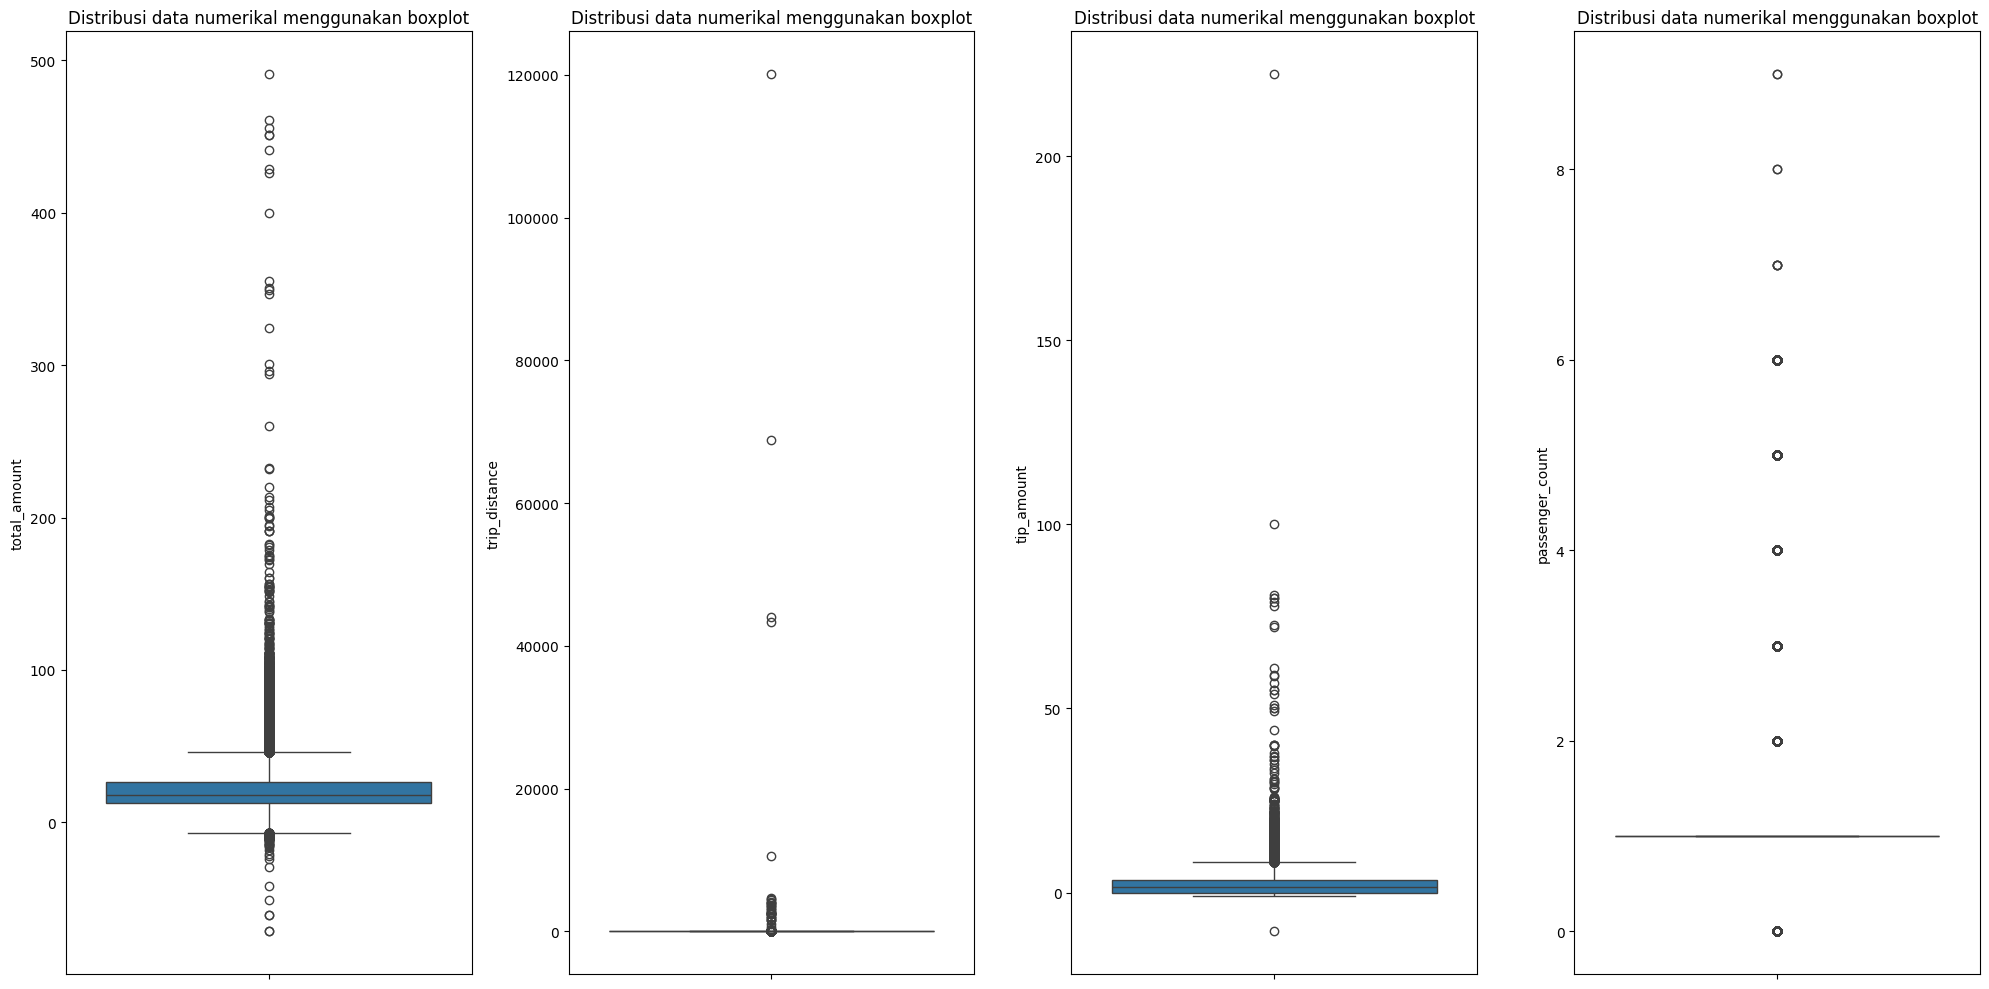

In [131]:
# menampilkan distribusi data menggunakan boxplot
plt.figure(figsize=(20,10))
for i in range(0, len(numerik)):
    plt.subplot(1, len(numerik), i+1)
    sns.boxplot(y=df[numerik[i]], orient = 'v')
    plt.tight_layout()
    plt.title('Distribusi data numerikal menggunakan boxplot')

plt.show()

## lpep_pickup_datetime dan lpep_dropoff_datetime

mengubah kolom lpep_pickup_datetime dan lpep_dropoff_datetime yang memiliki tipe data object, menjadi tipe data datetime.

In [132]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])
print(df.dtypes)

VendorID                 int64         
lpep_pickup_datetime     datetime64[ns]
lpep_dropoff_datetime    datetime64[ns]
store_and_fwd_flag       object        
RatecodeID               float64       
PULocationID             int64         
DOLocationID             int64         
passenger_count          float64       
trip_distance            float64       
fare_amount              float64       
extra                    float64       
mta_tax                  float64       
tip_amount               float64       
tolls_amount             float64       
ehail_fee                float64       
improvement_surcharge    float64       
total_amount             float64       
payment_type             float64       
trip_type                float64       
congestion_surcharge     float64       
dtype: object


In [133]:
# mengambil hari pada kolom 'lpep_pickup_datetime' dan membuat kolom baru

df['day'] = df['lpep_pickup_datetime'].dt.day_name()

# mengambil jam pada kolom 'lpep_pickup_datetime' dan membuat kolom baru

df['hour'] = df['lpep_pickup_datetime'].dt.hour

# mengambil bulan pada kolom 'lpep_pickup_datetime' dan membuat kolom baru

df['month'] = df['lpep_pickup_datetime'].dt.month

## RatecodeID

Menghapus anomali pada kolom RatecodeID, yaitu terdapat nilai '99'

In [134]:
df[df['RatecodeID'] == 99]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,...,0.0,NaN,1.0,19.7,1.0,NaN,0.0,Sunday,19,1
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,...,0.0,NaN,1.0,25.0,1.0,NaN,0.0,Monday,16,1
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,...,0.0,NaN,1.0,29.7,1.0,NaN,0.0,Thursday,20,1
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,...,0.0,NaN,1.0,24.0,1.0,NaN,0.0,Sunday,11,1
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,...,0.0,NaN,1.0,25.7,1.0,NaN,0.0,Sunday,13,1
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,...,0.0,NaN,1.0,16.7,1.0,NaN,0.0,Sunday,17,1
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,...,0.0,NaN,1.0,16.7,1.0,NaN,0.0,Thursday,1,1
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,...,0.0,NaN,1.0,41.7,1.0,NaN,0.0,Thursday,17,1
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,...,0.0,NaN,1.0,16.7,1.0,NaN,0.0,Saturday,20,1
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,...,0.0,NaN,1.0,51.7,1.0,NaN,0.0,Monday,13,1


In [135]:
# hapus data anomali

df = df.drop(df[df.RatecodeID == 99].index)

In [136]:
df[df['RatecodeID'] == 99]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month


In [138]:
df['RatecodeID'].mode()

,RatecodeID
0,1.0


In [137]:
# handling missing value RatecodeID dengan menggunakan mode

mode_ratecodeid = df['RatecodeID'].mode().iloc[0]
df['RatecodeID'].fillna(mode_ratecodeid, inplace=True)

## total_amount

Terdapat anomali pada kolom total_amount bernilai negatif atau kurang dari 0. maka baris yang nilainya negatif akan dilakukan tindakan berupa penghapusan pada baris tersebut.

In [139]:
df.drop(df.index[df['total_amount'] < 0 ], inplace=True)
df[df['total_amount'] < 0 ].count()

,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,0
RatecodeID,0
PULocationID,0
DOLocationID,0
passenger_count,0
trip_distance,0
fare_amount,0


In [199]:
df.drop(df.index[(df['passenger_count'] > 0) & (df['total_amount'] == 0)], inplace=True)
df[(df['passenger_count'] > 0) & (df['total_amount'] == 0)].count()

,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,0
RatecodeID,0
PULocationID,0
DOLocationID,0
passenger_count,0
trip_distance,0
fare_amount,0


karena total_amount tidak terdistribusi normal maka kita akan menggunakan Interquartile Range (IQR) untuk mengidentifikasi dan menghapus outliers.

In [200]:
# Hitung IQR untuk kolom total_amount
Q1 = df['total_amount'].quantile(0.25)
Q3 = df['total_amount'].quantile(0.75)
IQR = Q3 - Q1

# Tentukan batas IQR untuk mengidentifikasi outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter data yang bukan outliers
df_filtered = df[(df['total_amount'] >= lower_bound) & (df['total_amount'] <= upper_bound)]

# Hitung kembali total_amount dengan komponen tarif yang sesuai
df_filtered['total_amount'] = (
    df_filtered['fare_amount'] +
    df_filtered['mta_tax'] +
    df_filtered['improvement_surcharge'] +
    df_filtered['tip_amount'] +
    df_filtered['tolls_amount']
)


In [201]:
df['total_amount'].describe()

,total_amount
count,53230.000000
mean,23.884948
std,14.363269
min,1.010000
25%,15.000000
50%,19.900000
75%,28.050000
max,349.600000


## trip_distance

Terdapat anomali pada kolom trip_distance 0 mill dan > 100 mill karena total_amount nya tidak masuk akal berdasarkan aturan tarif [disini](https://home.nyc.gov/site/tlc/passengers/taxi-fare.page). Maka baris dengan kolom trip_distance < 1 dan > 100 mil akan dilakukan tindakan berupa penghapusan baris tersebut.

In [202]:
df[df['trip_distance'] > 100]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month


In [203]:
df[df['total_amount'] < 1]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month


In [204]:
# Filter data dengan trip_distance < 100 mil
filtered_data = df[df['trip_distance'] < 100]

# Tampilkan kolom trip_distance dan total_amount
result_df = filtered_data[['trip_distance', 'total_amount']]

# Cetak hasil
result_df

,trip_distance,total_amount
0,2.58,24.18
1,1.81,15.84
2,1.30,10.20
3,1.10,8.00
4,2.78,22.95
...,...,...
53232,3.92,25.02
53233,2.14,5.41
53234,3.44,21.04
53235,3.03,19.18


In [205]:
# Filter data dengan trip_distance > 100 mil
filtered_data = df[df['trip_distance'] > 100].head(100)

# Tampilkan kolom trip_distance dan total_amount
result_df = filtered_data[['trip_distance', 'total_amount']]

# Cetak hasil
result_df

,trip_distance,total_amount


In [206]:
# Menghapus baris dengan 'trip_distance' lebih dari 100 mil
df.drop(df.index[df['trip_distance'] > 100], inplace=True)

# Menghapus baris dengan 'trip_distance' kurang dari 1
df.drop(df.index[df['trip_distance'] < 1], inplace=True)

In [207]:
df['trip_distance'].describe()

,trip_distance
count,53230.000000
mean,3.236086
std,2.887660
min,1.000000
25%,1.530000
50%,2.290000
75%,3.770000
max,66.180000


## passenger_count

Berdasarkan aturan maksimal [jumlah penumpang](https://www.nyc.gov/site/tlc/passengers/passenger-frequently-asked-questions.page#), maksimal penumpang adalah sebesar 5 orang, dan tidak mungkin kosong jika nilai total_amount tidak kosong

In [208]:
# Check unique data kolom passenger_count
df['passenger_count'].value_counts()

,count
passenger_count,
1.0,46654
2.0,4069
5.0,1448
3.0,754
4.0,305


In [209]:
# Mengecek total_amount pada passenger_count yang sama dengan 0
invalid_passenger_count = df[df['passenger_count'] == 0]['total_amount']

# Menampilkan hasil
print("Total Amount for Passenger Count 0:")
invalid_passenger_count

Total Amount for Passenger Count 0:


,total_amount


In [210]:
df['passenger_count'].median()

1.0

In [211]:
# Menghapus jumlah penumpang lebih dari 5 orang
df.drop(df.index[df['passenger_count'] > 5], inplace=True)
df['passenger_count'].value_counts()

# Mengganti nilai 0 pada jumlah penumpang dengan median
# Hitung median passenger_count (tanpa memasukkan nilai 0)
median_passenger_count = df[df['passenger_count'] > 0]['passenger_count'].median()

# Mengganti nilai 0 dengan median passenger_count
df['passenger_count'].replace(0, median_passenger_count, inplace=True)

In [212]:
median_passenger_count = df['passenger_count'].median()
df['passenger_count'].fillna(median_passenger_count, inplace=True)

In [213]:
# Check unique data kolom passenger_count
df['passenger_count'].value_counts()

,count
passenger_count,
1.0,46654
2.0,4069
5.0,1448
3.0,754
4.0,305


## ehail_fee

[ehai](https://home.nyc.gov/site/tlc/passengers/taxi-fare.page) adalah aplikasi untuk memesan taxi dengan penawaran harga dimuka, dan dikenakan biaya tambahan ketika aplikasi ini digunakan. namun untuk saat ini kolom ehail_fee masih kosong, yang artinya belum ada penumpang yang menggunakan aplikasi ini. sehingga kita bisa drop kolom ehail_fee karena tidak mempengaruhi data apapun untuk saat ini.

In [214]:
df.drop(columns=['ehail_fee'], inplace=True)

KeyError: "['ehail_fee'] not found in axis"

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53230 entries, 0 to 53236
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               53230 non-null  int64         
 1   lpep_pickup_datetime   53230 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  53230 non-null  datetime64[ns]
 3   store_and_fwd_flag     53230 non-null  object        
 4   RatecodeID             53230 non-null  float64       
 5   PULocationID           53230 non-null  int64         
 6   DOLocationID           53230 non-null  int64         
 7   passenger_count        53230 non-null  float64       
 8   trip_distance          53230 non-null  float64       
 9   fare_amount            53230 non-null  float64       
 10  extra                  53230 non-null  float64       
 11  mta_tax                53230 non-null  float64       
 12  tip_amount             53230 non-null  float64       
 13  tolls_

## store_and_fwd_flag

In [216]:
# Cek jumlah nilai unik dalam kolom store_and_fwd_flag
unique_values = df['store_and_fwd_flag'].unique()
print(unique_values)

['N' 'Y']


Missing values pada kolom ini diisi dengan modus karena kolom ini berisi data kategorik yang dapat diwakili oleh nilai yang paling umum.

In [217]:
# mengisi nilai NaN dengan modus
if df['store_and_fwd_flag'].isna().any():
    mode_value = df['store_and_fwd_flag'].mode().iloc[0]
    df['store_and_fwd_flag'].fillna(mode_value, inplace=True)

# Cek jumlah nilai unik dalam kolom store_and_fwd_flag setelah dilakukan imputasi
unique_values = df['store_and_fwd_flag'].unique()

print(unique_values)

['N' 'Y']


## trip_tipe

Missing values pada kolom ini diisi dengan modus karena kolom ini berisi data kategorik yang dapat diwakili oleh nilai yang paling umum.

In [218]:
df['trip_type'].mode()

,trip_type
0,1.0


In [219]:
unique_values = df['trip_type'].unique()

print(unique_values)

[1. 2.]


In [220]:
mode_trip_type = df['trip_type'].mode().iloc[0]
df['trip_type'].fillna(mode_trip_type, inplace=True)

In [221]:
unique_values = df['trip_type'].unique()

print(unique_values)

[1. 2.]


## congestion_surcharge

Missing values pada kolom ini diisi dengan median karena kolom ini berisi data numerik yang distribusi tidak normal.

In [222]:
df['congestion_surcharge'].describe()

,congestion_surcharge
count,53230.000000
mean,0.804725
std,1.251101
min,0.000000
25%,0.000000
50%,0.000000
75%,2.750000
max,2.750000


In [223]:
median_congestion_surcharge = df['congestion_surcharge'].median()
df['congestion_surcharge'].fillna(median_congestion_surcharge, inplace=True)

In [224]:
df['congestion_surcharge'].unique()

array([2.75, 0.  , 2.5 ])

## payment_type

Missing values pada kolom ini diisi dengan nilai 5.0 karena sesuai dengan data dictionary bahwa tipe pembayaran tidak diketahui bernilai 5.

In [225]:
# Mengisi missing value dengan value 5 = tipe payment tidak diketahui
isi_payment_type = df['payment_type'].fillna(5.0, inplace=True)

In [226]:
df.isna().sum()

,0
VendorID,0
lpep_pickup_datetime,0
lpep_dropoff_datetime,0
store_and_fwd_flag,0
RatecodeID,0
PULocationID,0
DOLocationID,0
passenger_count,0
trip_distance,0
fare_amount,0


In [227]:
df

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,day,hour,month
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.90,...,4.03,0.0,1.0,24.18,1.0,1.0,2.75,Sunday,0,1
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.70,...,2.64,0.0,1.0,15.84,1.0,1.0,0.00,Sunday,0,1
2,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.50,...,1.70,0.0,1.0,10.20,1.0,1.0,0.00,Sunday,0,1
3,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.00,...,0.00,0.0,1.0,8.00,1.0,1.0,0.00,Sunday,0,1
4,2,2023-01-01 00:53:31,2023-01-01 01:11:04,N,1.0,41,262,1.0,2.78,17.70,...,0.00,0.0,1.0,22.95,2.0,1.0,2.75,Sunday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53232,2,2023-01-31 21:56:00,2023-01-31 22:14:00,N,1.0,75,186,1.0,3.92,20.72,...,1.25,0.0,0.3,25.02,5.0,1.0,0.00,Tuesday,21,1
53233,2,2023-01-31 22:40:00,2023-01-31 22:48:00,N,1.0,10,205,1.0,2.14,4.41,...,0.00,0.0,1.0,5.41,5.0,1.0,0.00,Tuesday,22,1
53234,2,2023-01-31 23:46:00,2023-02-01 00:02:00,N,1.0,66,37,1.0,3.44,16.53,...,3.51,0.0,1.0,21.04,5.0,1.0,0.00,Tuesday,23,1
53235,2,2023-01-31 23:01:00,2023-01-31 23:19:00,N,1.0,225,189,1.0,3.03,14.98,...,3.20,0.0,1.0,19.18,5.0,1.0,0.00,Tuesday,23,1


In [228]:
# Selanjutnya akan dibuat index, untuk reset index pada setiap barisnya
x = df.reset_index()
df =  x.drop(columns='index')

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53230 entries, 0 to 53229
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               53230 non-null  int64         
 1   lpep_pickup_datetime   53230 non-null  datetime64[ns]
 2   lpep_dropoff_datetime  53230 non-null  datetime64[ns]
 3   store_and_fwd_flag     53230 non-null  object        
 4   RatecodeID             53230 non-null  float64       
 5   PULocationID           53230 non-null  int64         
 6   DOLocationID           53230 non-null  int64         
 7   passenger_count        53230 non-null  float64       
 8   trip_distance          53230 non-null  float64       
 9   fare_amount            53230 non-null  float64       
 10  extra                  53230 non-null  float64       
 11  mta_tax                53230 non-null  float64       
 12  tip_amount             53230 non-null  float64       
 13  t

Total data dari dataset NYC TLC Trip Record awalnya adalah sebanyak 68.211, setelah dilakukan cleaning data, maka total data akhir adalah 53237.

In [230]:
# menyimpan data set kedalam excel

df.to_excel("NYC_TLC_Trip_Record_Cleaned.xlsx")

# **Data Analisis**
---

## Pola Perjalanan Taxi Berdasarkan Jumlah Penumpang

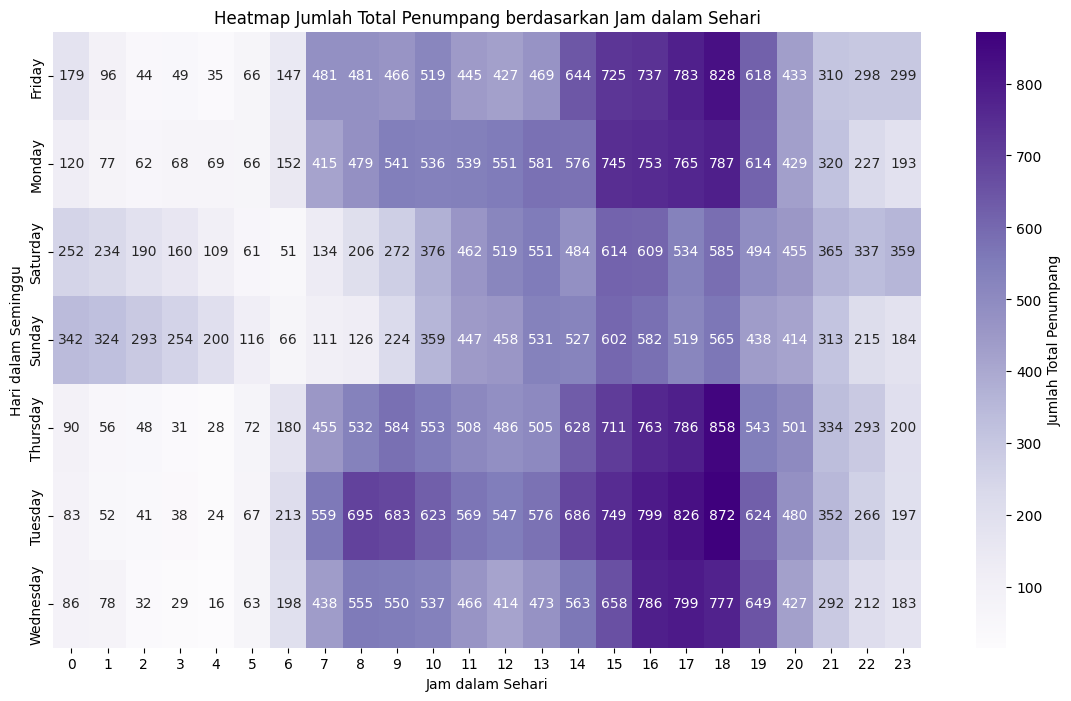

In [242]:
# Membuat heatmap distribusi jumlah penumpang berdasarkan jam dalam sehari
passenger_counts = df.groupby(['day', 'hour'])['passenger_count'].sum().reset_index(name='total_passenger_count')

# Menggunakan pivot_table untuk menghindari TypeError
heatmap_data_passenger = passenger_counts.pivot_table(index='day', columns='hour', values='total_passenger_count', aggfunc='sum')

# Visualisasi heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data_passenger, cmap='Purples' , annot=True, fmt='.0f', cbar_kws={'label': 'Jumlah Total Penumpang'})
plt.title('Heatmap Jumlah Total Penumpang berdasarkan Jam dalam Sehari')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Hari dalam Seminggu')
plt.show()


### Analisis:

1. **Gambaran Umum**
    - Visualisasi ini menggambarkan pola distribusi jumlah total penumpang taksi berdasarkan jam dalam sehari dan hari dalam seminggu.
    - Warna yang lebih gelap menunjukkan jumlah penumpang yang lebih tinggi pada waktu tertentu.

2. **Puncak Aktivitas, dan Jam Sibuk:**
   - Puncak warna gelap pada heatmap menunjukkan jam-jam di mana jumlah penumpang taksi mencapai tingkat tertinggi. Lokasi puncak ini dapat menjadi fokus perhatian untuk manajemen armada dan alokasi sumber daya. Berdasarkan informasi diatas dapat dilihat bahwa pada rentang pukul (07.00 - 20.00) jumlah penumpang cenderung terlihat lebih aktif, dan puncaknya adalah pada rentang pukul (15.00-18.00)

3. **Pola Berdasarkan Hari dalam Seminggu:**
   - Perbedaan pola distribusi jumlah penumpang pada hari dalam seminggu, dapat memberikan wawasan tentang perilaku penumpang. Berdasarkan data diatas, jumlah pada akhir pekan (Sabtu dan Minggu) terlihat lebih lengah dibanding pada hari lainnya.

4. **Perubahan Jumlah Penumpang Berdasarkan Hari:**
   - Perubahan signifikan terlihat pada pukul (07.00 - 09.00) pada akhir pekan (Sabtu dan Minggu) dibanding pada  hari kerja.
   - Pada weekdays (diluar sabtu minggu) terdapat perubahan signifikan pada pukul (21.00 - 06.00). Pada rentang waktu tersebut, jumlah penumpang terlihat lebih sedikit dibanding waktu lainnya.
   - Pada hari sabtu menjelang minggu antara pukul (21.00 di hari sabtu - 05.00 di hari minggu) terlihat jumlah penumpang lebih banyak/aktif dibanding hari lainnya.

## Tren permintaan penumpang berdasarkan jumlah penumpang per jam

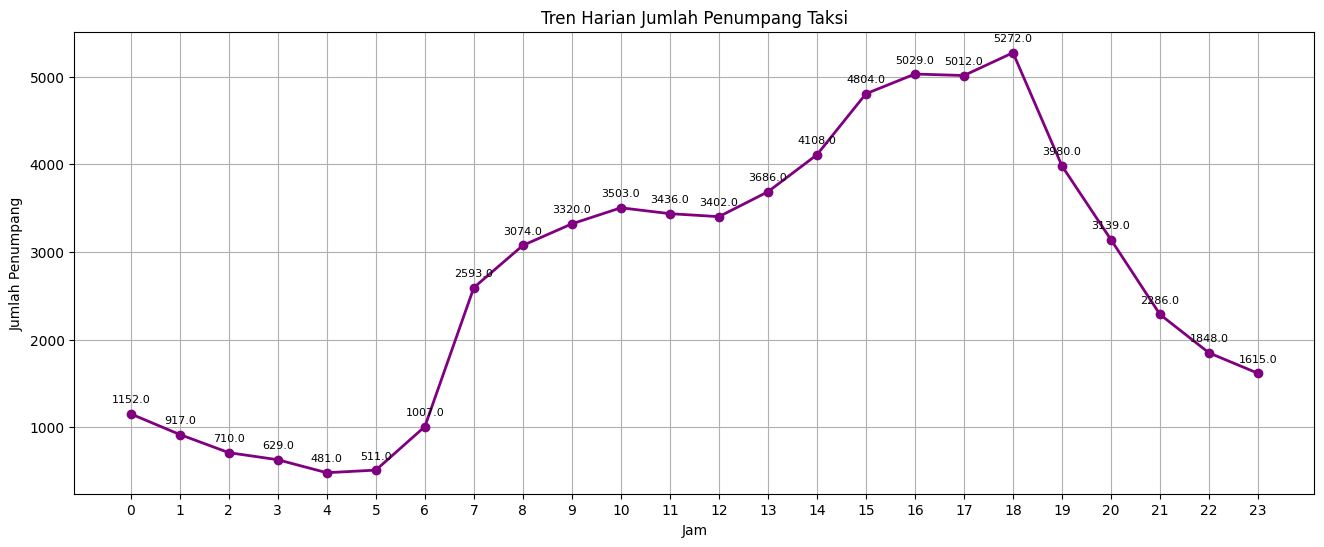

In [239]:
# Menghitung jumlah penumpang per jam
passenger_counts_hourly = df.groupby('hour')['passenger_count'].sum()

# Visualisasi tren harian
plt.figure(figsize=(16, 6))
passenger_counts_hourly.plot(linewidth=2, marker='o', color='purple')
plt.title('Tren Harian Jumlah Penumpang Taksi')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penumpang')
plt.xticks(range(len(passenger_counts_hourly.index)), passenger_counts_hourly.index)
plt.grid(True)

for i, count in enumerate(passenger_counts_hourly):
    plt.annotate(f"{count}", (i, count), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8)
plt.show()



#### **Analisis:**

Berdasarkan visualisasi di atas, dapat disimpulkan bahwa:

1. **Puncak Permintaan Penumpang:**
    - Tren harian menunjukkan bahwa puncak permintaan penumpang tertinggi terjadi pada pukul 17.00-18.00 dengan jumlah penumpang mencapai 5272 penumpang.

2. **Tren Menurun dan Peningkatan Signifikan:**
    - Permintaan penumpang cenderung menurun pada dini hari (pukul 24.00 - 04.00), namun kemudian mengalami peningkatan yang signifikan mulai dari pagi hingga mencapai puncaknya pada sore hari.

3. **Waktu Sibuk Potensial:**
    - Jam-jam tertentu, seperti pukul 07.00 - 08.00, 08.00 - 09.00, 15.00 - 16.00, dan puncak tertinggi pada jam 17.00 - 18.00, menunjukkan peningkatan signifikan dalam jumlah penumpang. Hal ini mengindikasikan potensi waktu-waktu sibuk yang dapat dimanfaatkan oleh pengemudi taksi dan layanan transportasi.

4. **Pentingnya Perencanaan pada Jam Puncak:**
    - Pengemudi taksi dan penyedia layanan transportasi perlu memperhatikan jam-jam puncak, terutama pada pukul 17.00 dan 18.00. Adanya lonjakan permintaan pada periode ini menandakan pentingnya perencanaan operasional dan penugasan armada untuk memenuhi kebutuhan tinggi penumpang.

5. **Pentingnya Strategi pada Jam Malam:**
    - Meskipun permintaan cenderung menurun pada pukul 24.00 - 05.00, strategi operasional dan promosi pada jam ini dapat membantu meningkatkan penggunaan layanan pada periode tersebut.

## Tren Permintaan Penumpang Berdasarkan Jumlah Penumpang Per Hari

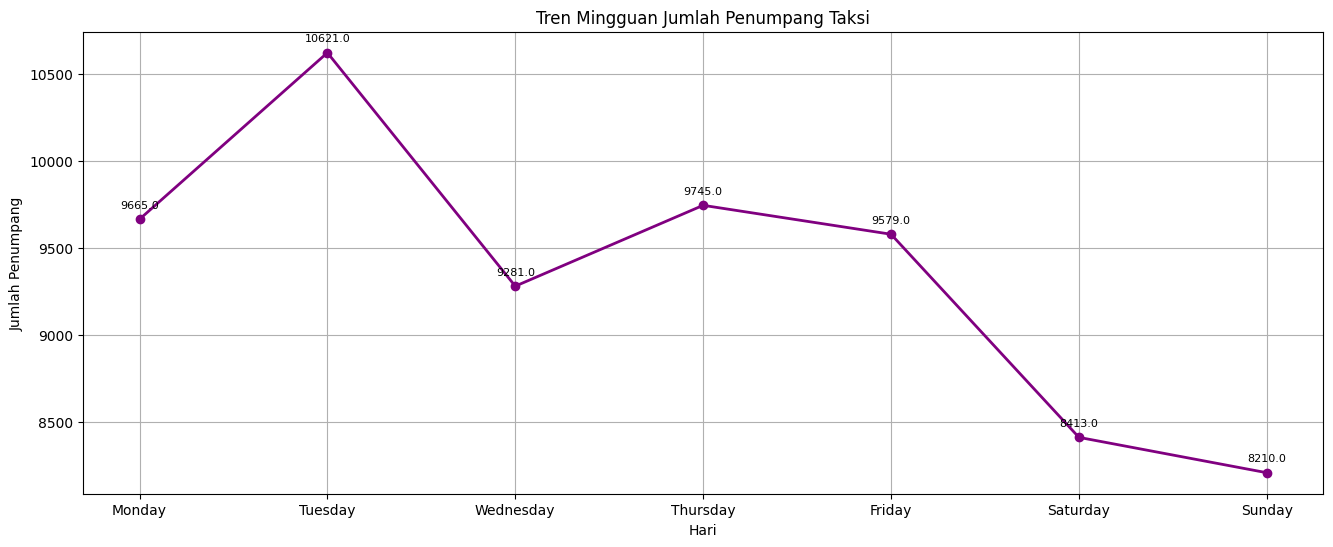

In [241]:
# Menghitung jumlah penumpang per hari
passenger_counts_daily = df.groupby('day')['passenger_count'].sum()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Mengubah tipe data 'day' menjadi kategori dengan urutan yang ditentukan
passenger_counts_daily.index = pd.Categorical(passenger_counts_daily.index, categories=days_order, ordered=True)

# Mengurutkan berdasarkan urutan kategori
passenger_counts_daily = passenger_counts_daily.sort_index()

# Visualisasi tren mingguan
plt.figure(figsize=(16, 6))
passenger_counts_daily.plot(linewidth=2, marker='o', color='purple')  # Menambahkan marker pada setiap poin
plt.title('Tren Mingguan Jumlah Penumpang Taksi')
plt.xlabel('Hari')
plt.ylabel('Jumlah Penumpang')
plt.grid(True)
plt.xticks(range(len(passenger_counts_daily.index)), passenger_counts_daily.index)  # Menambahkan label waktu

# Menambahkan anotasi
for i, count in enumerate(passenger_counts_daily):
    plt.annotate(f"{count}", (i, count), textcoords="offset points", xytext=(0,8), ha='center', fontsize=8)

plt.show()



#### **Analisis :**

Berdasarkan visualisasi di atas dapat disimpulkan bahwa :

1. **Tren Harian:**
    - Jumlah penumpang tertinggi terjadi pada hari Selasa dengan 10621 penumpang.
    - Pada hari Sabtu dan Minggu, jumlah penumpang cenderung lebih rendah dibandingkan dengan hari-hari kerja.

2. **Perbedaan Antara Hari Kerja dan Akhir Pekan:**
    - Jumlah penumpang pada hari Senin hingga Jumat (hari kerja) cenderung lebih tinggi dibandingkan dengan Sabtu dan Minggu (akhir pekan).

3. **Tren Mingguan:**
    - Grafik menunjukkan tren mingguan yang konsisten, dengan fluktuasi tertentu di sepanjang minggu.
    - Ada peningkatan di awal minggu (Senin ke Selasa), kemudian cenderung menurun menjelang akhir pekan (Jumat hingga Minggu).

# Kesimpulan

1. **Pola Perjalanan Berdasarkan Jumlah Penumpang:**
   - Puncak aktivitas terjadi pada rentang waktu 15.00 - 18.00, dengan Selasa memiliki jumlah penumpang tertinggi.
   - Aktivitas penumpang cenderung lebih rendah pada akhir pekan, terutama Sabtu dan Minggu.

2. **Tren Permintaan Penumpang per Jam:**
   - Puncak permintaan terjadi pada jam 17.00-18.00, mencapai 5272 penumpang.
   - Jam-jam sibuk lainnya adalah 07.00-08.00, 08.00-09.00, dan 15.00-16.00.
   - Permintaan menurun pada dini hari dan meningkat pada pagi hingga sore hari.
   - Pentingnya perencanaan dan penugasan armada pada jam puncak, terutama pada pukul 17.00-18.00.

3. **Tren Permintaan Penumpang per Hari:**
   - Perbedaan pola antara weekdays dan weekend menunjukkan potensi waktu sibuk yang berbeda pada setiap periode.
   **Tren Permintaan Penumpang per Hari:**
   1. **Tren Harian:**
   - Jumlah penumpang tertinggi terjadi pada hari Selasa dengan 11484 penumpang.
   - Pada hari Sabtu dan Minggu, jumlah penumpang cenderung lebih rendah dibandingkan dengan hari-hari kerja.
   2. **Tren Mingguan:**
   - Grafik menunjukkan tren mingguan yang konsisten, dengan fluktuasi tertentu di sepanjang minggu.

# Rekomendasi

1. **Optimasi Armada dan Pengemudi:**
   - *Saran:* Tingkatkan jumlah armada dan pengemudi selama jam-jam puncak pada rentang waktu 15.00 - 18.00.
   - *Langkah Aksi:* Pastikan ketersediaan maksimal armada dan pengemudi untuk memenuhi tingginya permintaan penumpang.

2. **Promosi dan Insentif pada Jam Sibuk:**
   - *Saran:* Terapkan program promosi atau insentif pada jam-jam potensial, seperti pada rentang waktu 08.00 - 10.00.
   - *Langkah Aksi:* Rancang insentif atau diskon khusus untuk meningkatkan penggunaan taksi selama jam-jam sibuk.

3. **Penyesuaian Tarif dan Diskon pada Jam Tertentu:**
   - *Saran:* Implementasikan tarif dinamis atau diskon pada jam-jam lengang untuk memicu permintaan.
   - *Langkah Aksi:* Evaluasi dan terapkan kebijakan tarif yang lebih fleksibel atau diskon pada rentang waktu yang kurang diminati.

4. **Pelatihan Pengemudi pada Pola Tren Harian:**
   - *Saran:* Berikan pelatihan kepada pengemudi tentang pola tren harian, terutama pada jam-jam sibuk.
   - *Langkah Aksi:* Lakukan pelatihan mengenai strategi optimal dalam menghadapi tingginya permintaan pada jam-jam tertentu.

5. **Promo Menarik pada Hari-Hari yang Kurang Aktif:**
   - *Saran:* Rancang promo menarik untuk meningkatkan penggunaan taksi pada hari Sabtu dan Minggu.
   - *Langkah Aksi:* Implementasikan promosi khusus untuk merangsang penggunaan taksi pada akhir pekan, seperti diskon akhir pekan.